## LAB 1
#### BY: Jasmeet Kaur


### Problem Statement
A data science team is working on an important project related to airports and optimization. You are a new team member and was hired as junior data scientist. Each team member has received a task and your task is to check if you can say that Delta Airlines (DL) flights are delayed more than United Airlines (UA) flights ? The file (data source) is already available to start your analysis. To solve this problem you will need to use statistical concepts and python programming language that are the foundation of modern machine learning development.

#### Installing and Importing required Libraries 

In [1]:
#installing researchpy for t test and sweetviz for EDA
!pip install researchpy
!pip install sweetviz
import sweetviz as sv
import numpy as np
import pandas as pd
import statistics
import scipy.stats as sp
from scipy.stats import sem
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp
import scipy.stats as stats
from matplotlib.lines import Line2D
%matplotlib inline



In [2]:
# Read the data set of flights
data= pd.read_csv("D:/AIDI Course/AI Algo/LAB1/flights.csv")

# Printing the data
data

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T14:00:00Z
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30T22:00:00Z
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T12:00:00Z
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T11:00:00Z


### Task 1: Create a Jupyter Notebook to present your analysis and perform an exploratory data analysis (EDA) on flights.csv file.


#### 1.1 Using sweetviz module to generate html report
The analyze module will be used to generate report

In [3]:
flights_report = sv.analyze(data)
flights_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### 1.2 Displaying concise summary for variables
Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. It shows the data type of variables and count of non null values for the variables

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

#### 1.3 Displaying Descriptive statistics
Dataframe.describe() method is used for Descriptive statistics including those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

In [5]:
data.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


#### 1.4 Displaying number of null values for each column
Dataframe.isnull().sum() method is used to display number of null values for each column. The following result shows that arr_delay has null values. This information is useful in subsequent tasks

In [6]:
data.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

#### 1.5 Displaying correlation of arr_delay wih other variables
From the below result it can be noted tht arrival delay depends largely on departure delay as there is a srong positive correlation between arr_delay and dep_delay

In [7]:
data.corr()['arr_delay']

year                   NaN
month            -0.017382
day              -0.000319
dep_time          0.232306
sched_dep_time    0.173896
dep_delay         0.914803
arr_time          0.024482
sched_arr_time    0.133261
arr_delay         1.000000
flight            0.072862
air_time         -0.035297
distance         -0.061868
hour              0.173456
minute            0.021522
Name: arr_delay, dtype: float64

#### 1.6 Displaying total carriers
unique() method will be used to display the unique values for carrier

In [8]:
data['carrier'].unique()

array(['UA', 'AA', 'B6', 'DL', 'EV', 'MQ', 'US', 'WN', 'VX', 'FL', 'AS',
       '9E', 'F9', 'HA', 'YV', 'OO'], dtype=object)

#### 1.7 Displaying dataframe with records having zero arrival delays
From the output below, it can be seen 5409 records have zero arrival delays

In [9]:
no_arr_delay = data.query("arr_delay == 0")
display(no_arr_delay)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
35,2013,1,1,627.0,630,-3.0,1018.0,1018,0.0,US,27,N535UW,JFK,PHX,330.0,2153,6,30,2013-01-01T06:00:00Z
114,2013,1,1,807.0,810,-3.0,1043.0,1043,0.0,DL,269,N308DE,JFK,ATL,126.0,760,8,10,2013-01-01T08:00:00Z
217,2013,1,1,956.0,1000,-4.0,1241.0,1241,0.0,DL,1847,N956DL,LGA,ATL,129.0,762,10,0,2013-01-01T10:00:00Z
273,2013,1,1,1124.0,1125,-1.0,1445.0,1445,0.0,DL,1171,N376NW,LGA,RSW,169.0,1080,11,25,2013-01-01T11:00:00Z
317,2013,1,1,1219.0,1220,-1.0,1415.0,1415,0.0,AA,1757,N545AA,LGA,STL,161.0,888,12,20,2013-01-01T12:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336296,2013,9,30,1409.0,1415,-6.0,1550.0,1550,0.0,AA,1170,N4WAAA,LGA,STL,121.0,888,14,15,2013-09-30T14:00:00Z
336383,2013,9,30,1530.0,1530,0.0,1845.0,1845,0.0,AA,85,N385AA,JFK,SFO,324.0,2586,15,30,2013-09-30T15:00:00Z
336438,2013,9,30,1615.0,1620,-5.0,1828.0,1828,0.0,9E,4094,N805AY,JFK,RDU,64.0,427,16,20,2013-09-30T16:00:00Z
336491,2013,9,30,1703.0,1645,18.0,1915.0,1915,0.0,DL,884,N301NB,LGA,DEN,212.0,1620,16,45,2013-09-30T16:00:00Z


### Task 2: Create at least 5 different views (reports) to the team using the imported dataset. The reports should be composed of a description, charts and tables based on some selected columns. These reports can give some insights to the team about the airport operation and potential optimizations.

#### Report 1: Creatng a Vizualization to display top 5 Carriers with most arrival delays in 2013
Step 1: Creating a dataframe report1 to contain top 5 carrier with most arrival delays <br>
Step 2: Using Seaborn library to create barplot <br>
Step 3: adding data labels

[Text(0, 0, '807324'),
 Text(0, 0, '511194'),
 Text(0, 0, '269767'),
 Text(0, 0, '205589'),
 Text(0, 0, '127624')]

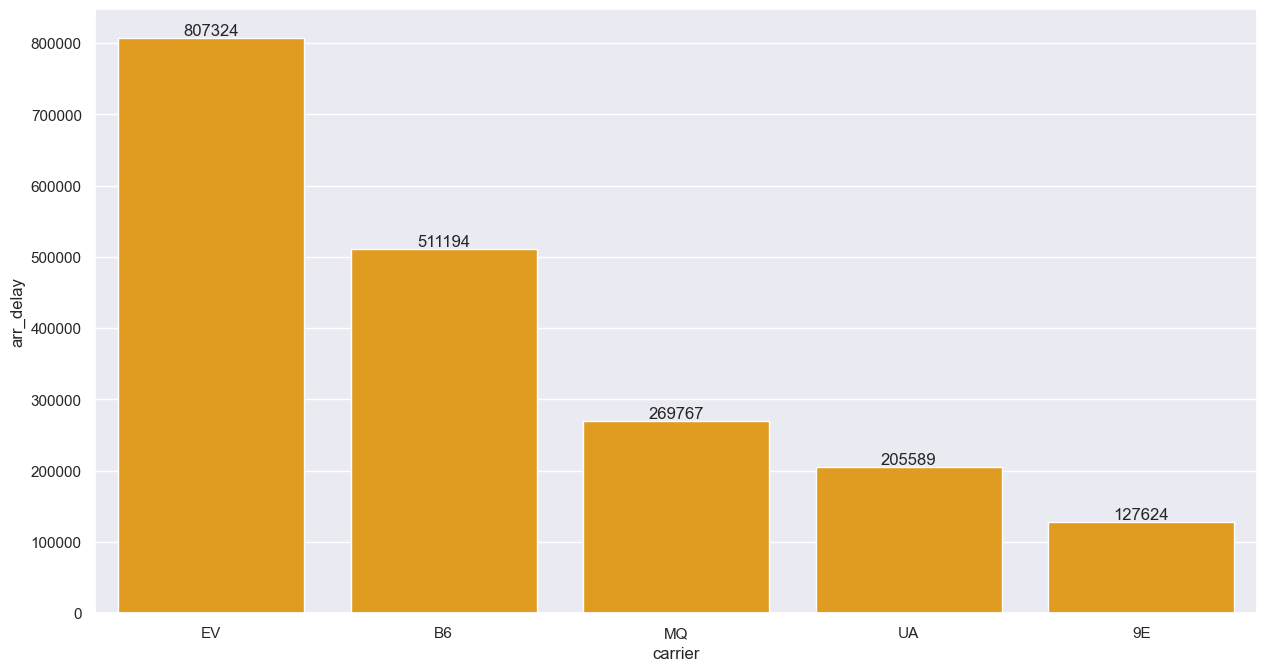

In [10]:
sns.set(rc = {'figure.figsize':(15,8)})
#step 1
report1 = data.groupby('carrier')['arr_delay'].sum().to_frame().nlargest(5, 'arr_delay')
report1.reset_index(inplace=True)
#step 2
ax1 = sns.barplot(x='carrier', y='arr_delay', data=report1, color = 'orange')
#step 3
ax1.bar_label(ax1.containers[0])

##### From the above graph, it can be seen that EV carrier experienced the most arrival delays in 2013 followed by B6 and MQ. UA follows next in experiencing the arrival delays.
_______________________________________________________________________________________________________________________________

#### Report 2: Creatng a Vizualization to display top 5 Carriers with most distance covered through flights in 2013
Step 1: Creating a dataframe report2 to contain top 5 carrier with most distance covered through flights in 2013 <br>
Step 2: Using Seaborn library to create barplot <br>
Step 3: adding data labels

[Text(0, 0, '8.97055e+07'),
 Text(0, 0, '5.95073e+07'),
 Text(0, 0, '5.83841e+07'),
 Text(0, 0, '4.38646e+07'),
 Text(0, 0, '3.0499e+07')]

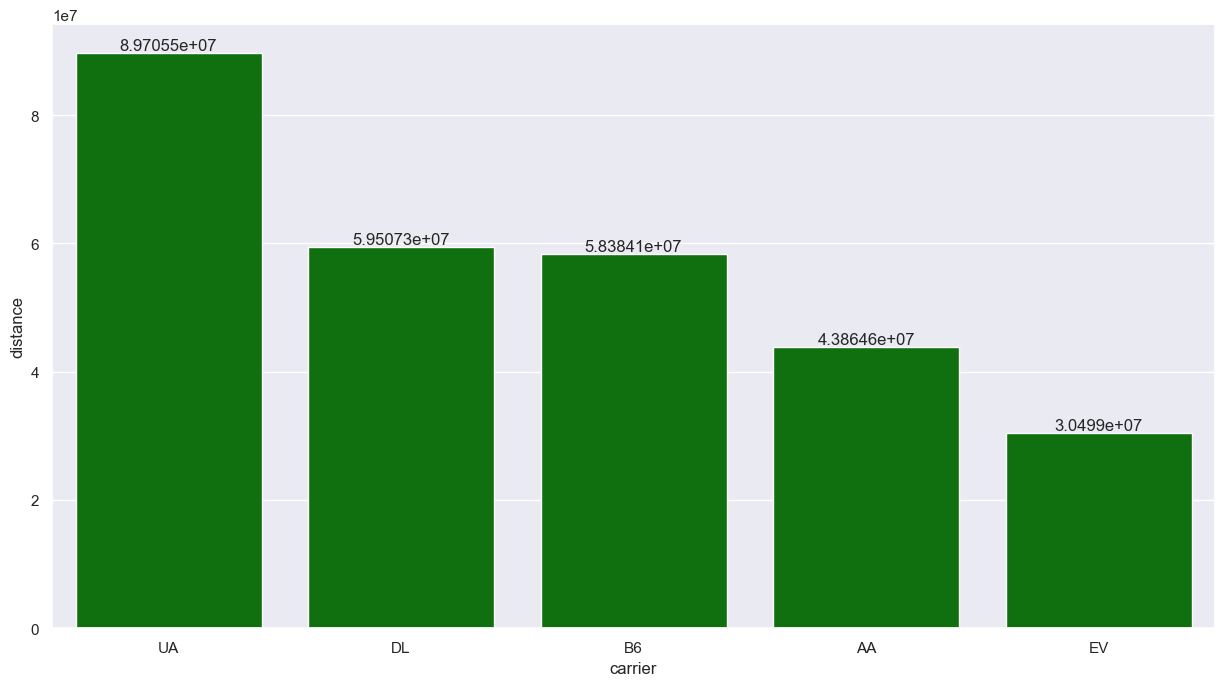

In [11]:
#step 1
report2 = data.groupby('carrier')['distance'].sum().to_frame().nlargest(5, 'distance')
report2.reset_index(inplace=True)
#step 2
ax2 = sns.barplot(x='carrier', y='distance', data=report2, color = 'green')
#step 3
ax2.bar_label(ax2.containers[0])

#### From the above graph, it can be concluded that UA carrier covered most disance in 2013 followed by DL carrier. UA and DL carriers are thus most widely used carriers in 2013
___________________________________________________________________________________________________________________________

#### Report 3: Creatng a Vizualization to display top 5 Months with most arrival delays in 2013
Step 1: Creating a dataframe report3 to contain top 5 months with most arrival delays <br>
Step 2: Using plot method on dataframe to generate bar plot <br>
Step 3: adding data labels

[Text(0, 0, '472813'),
 Text(0, 0, '446232'),
 Text(0, 0, '401797'),
 Text(0, 0, '308057'),
 Text(0, 0, '173705')]

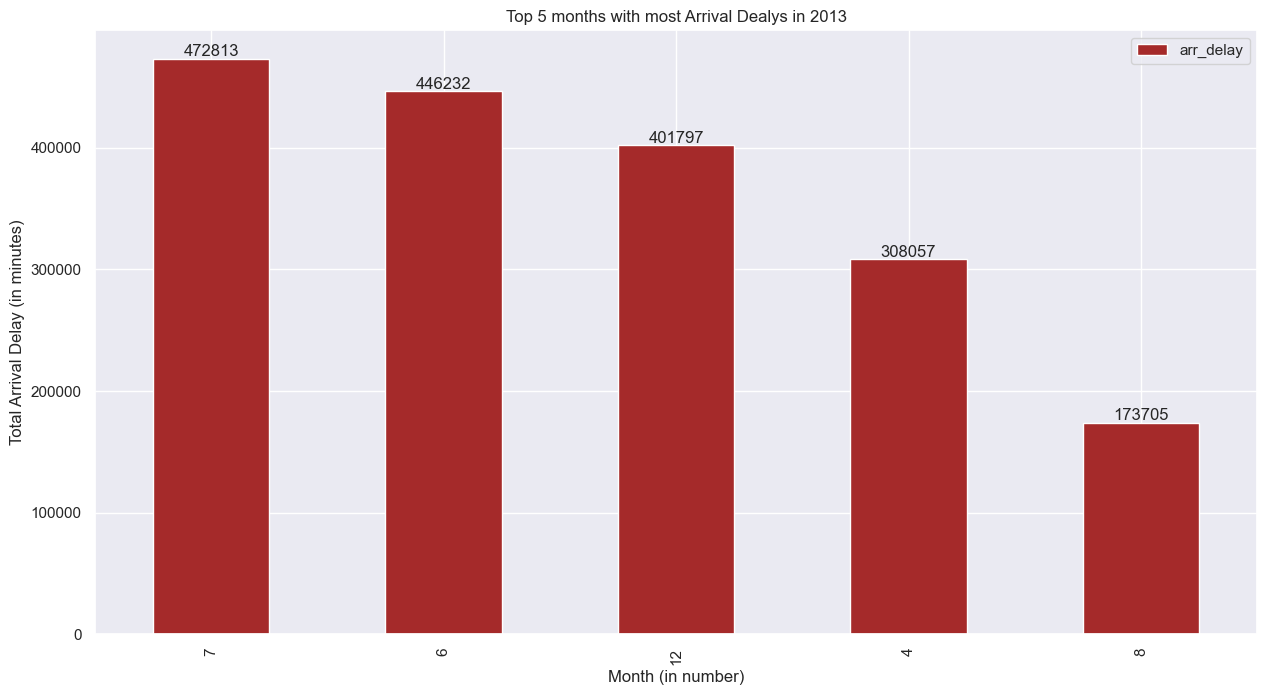

In [12]:
#step 1
report3 = data.groupby('month')['arr_delay'].sum().to_frame().nlargest(5, 'arr_delay')
#step 2
ax3 = report3.plot(kind='bar', title='Top 5 months with most Arrival Dealys in 2013', ylabel='Total Arrival Delay (in minutes)', color = 'brown', 
         xlabel='Month (in number)', figsize=(15, 8))
#step 3
ax3.bar_label(ax3.containers[0])

#### From the above graph, it can be ssen that 7th month i.e., July experienced most arrival delays in 2013 followed by 6th month i.e., June
_________________________________________________________________________________________________________________________

#### Report 4: Creatng a Vizualization to display arrival delays and departure delays for all three origins
Step 1: Creating a two sub dataframes: one to store arrival delays for all origins and other to store departure delay for all origins <br>
Step 2: Creating unified dataframe from two created in step 1 <br>
Step 3: Using Seaborn library to create barplot <br>
Step 4: Creating Legends <br>
Step 5: Displaying plot 

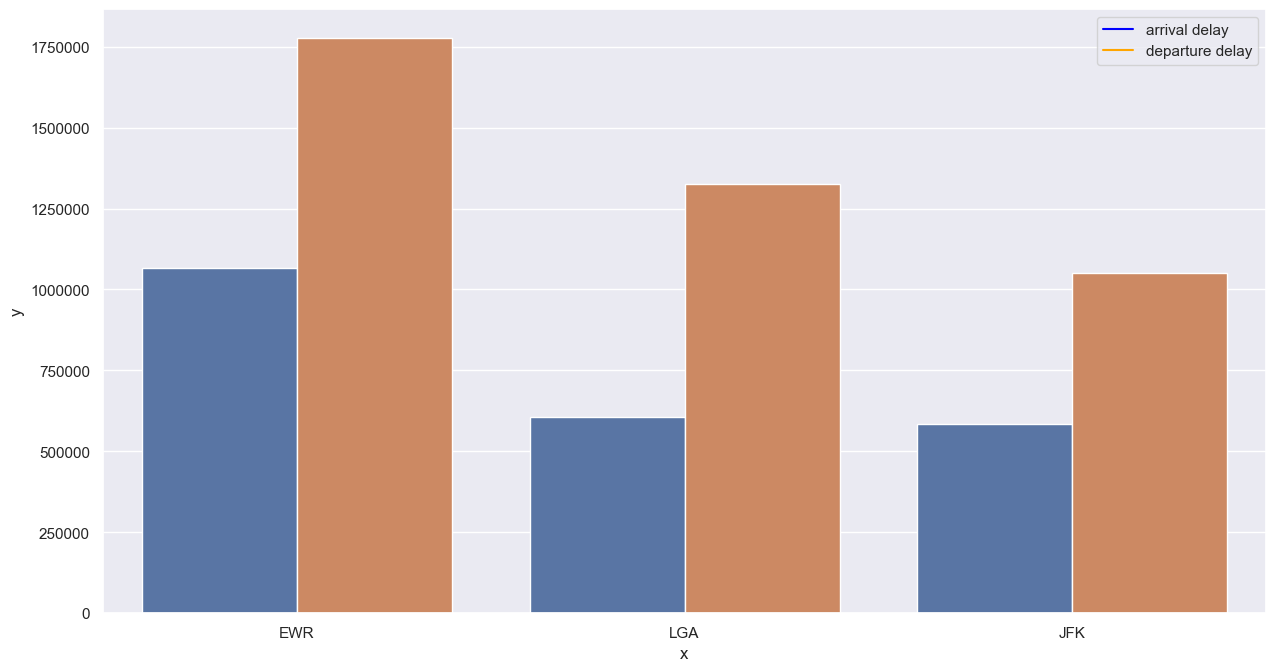

In [13]:

#step 1
report41 = pd.DataFrame({'x':['EWR', 'LGA', 'JFK'],'y':data.groupby('origin')['arr_delay'].sum()})
report42 = pd.DataFrame({'x':['EWR', 'LGA', 'JFK'],'y':data.groupby('origin')['dep_delay'].sum()})
report41['hue'] = 'blue'
report42['hue'] = 'orange'
#step 2
report4 = pd.concat([report41,report42])
#step 3
sns.barplot(x='x',y='y',data = report4, hue ='hue')
#step 4
a = Line2D([], [], color='blue', label='arrival delay')
b = Line2D([], [], color='orange', label='departure delay')
plt.legend(handles=[a, b])
#step 5
plt.show()

#### From the above graph, it can be seen that among three places, flights originating from EWR experienced most arrival delays as well as departure delays in 2013
_____________________________________________________________________________________________________________________________

#### Report 5: Creating a vizualisaion to display top 5 carriers that experienced no arrival delays in 2013 and also displaying which carrier experienced zero delays the most
Step 1: Creating a dataframe with zero arrival delays <br>
Step 2: Modifying the dataframe to contain top 5 carriers with zero arrival delays <br>
Step 3: Using Seaborn library to create barplot <br>
Step 4: Adding labels to plot <br>
Step 5: Adding data label

[Text(0, 0, '926'),
 Text(0, 0, '918'),
 Text(0, 0, '801'),
 Text(0, 0, '782'),
 Text(0, 0, '488')]

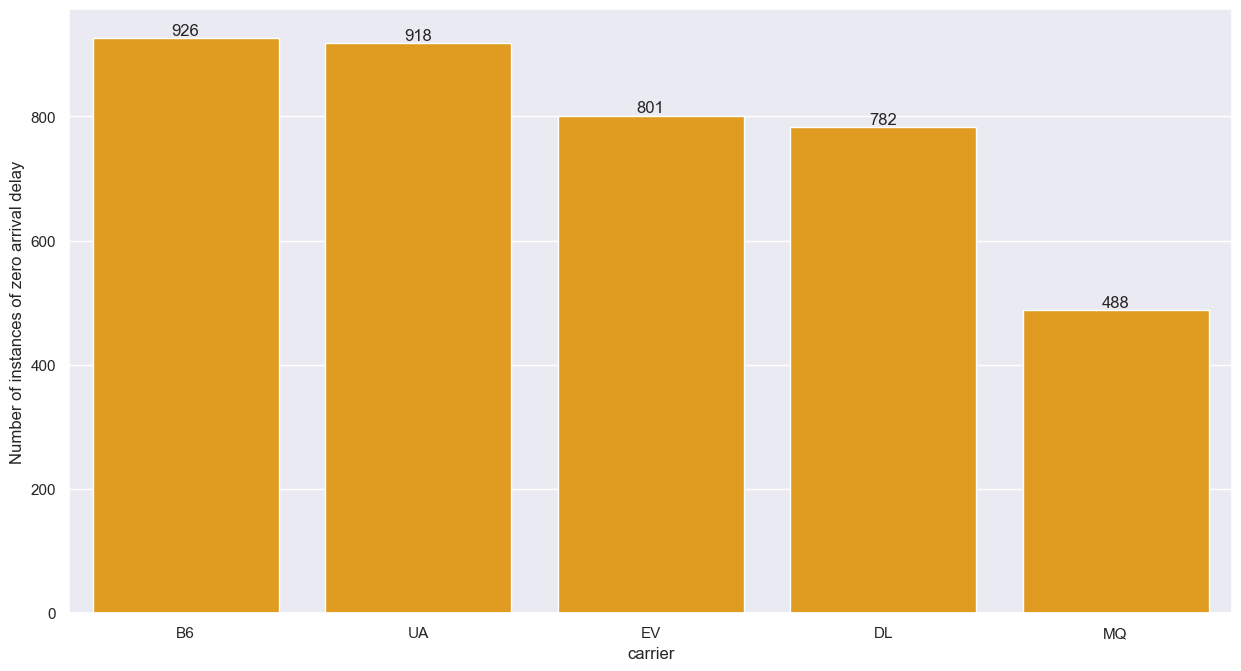

In [14]:
#step 1
report5 = data.query("arr_delay == 0")
#step 2
report5 = report5.groupby(['carrier']).count().nlargest(5, 'arr_delay')
report5.reset_index(inplace=True)
#step 3
ax5 = sns.barplot(x='carrier', y='arr_delay', data=report5, color = 'orange')
#step 4
plt.xlabel('carrier')
plt.ylabel('Number of instances of zero arrival delay')
#step 5 
ax5.bar_label(ax5.containers[0])

#### The visual shows the top 5 carriers having zero arrival delays in 2013. The x axis shows the carrier name and y axis shows the number of times carrier experienced zero arrival delays. According to the graph, B6 carrier was on time the most number of time with highest number of zero arrival delays

______________________________________________________________________________________________________________________________

### Task 3: Create a new dataset named (pop_data) with flight data from airlines UA (United Airlines) and DL (Delta Airlines). The data set must contain only two columns, company name and delayed arrival flights. The data must be extracted from dataset flights.csv to build the pop_data dataset. The dataset should be limited to no more than 20,000 rows per airlines.


#### Creating intermediate dataframe
Step 1: Creating a dataset df1 that contains only two columns 'carrier' and 'arr_delay' <br>
Step 2: Removing null values from the dataset by modifying datafarme df1 to contain not null values. (This is achieved by using negation operator '~' on dataframe obtained by 'isnull()' function. <br>
Step 3: printing the intermediate dataframe 

In [15]:
#step 1
df1 = data[['carrier', 'arr_delay']]
#step 2
df1 = df1[~df1['arr_delay'].isnull()]
#step 3
display(df1)

,carrier,arr_delay
0,UA,11.0
1,UA,20.0
2,AA,33.0
3,B6,-18.0
4,DL,-25.0
...,...,...
336765,B6,-17.0
336766,B6,-20.0
336767,B6,-16.0
336768,B6,1.0


#### Creating first filtered dataframe containing 20000 records for UA carrier
step 1: Creating filtered dataframe df_UA where carrier is 'UA' <br>
step 2: Creating sample dataset of 20000 records using sample function (replace = false to select distinct records. Also sample method allows to select different set of unique rows each time it is run) <br>
step 3: Display the dataframe

In [16]:
#step 1
df_UA = df1[df1.carrier.isin(["UA"])]
#step 2
df_UA = df_UA.sample(n = 20000, replace = False)
#step 3
display(df_UA)

,carrier,arr_delay
77580,UA,-8.0
46850,UA,-6.0
243325,UA,-6.0
277998,UA,14.0
130078,UA,-3.0
...,...,...
300354,UA,124.0
221317,UA,-2.0
100018,UA,-21.0
57796,UA,-9.0


#### Creating second filtered dataframe containing 20000 records for UA carrier
step 1: Creating filtered dataframe df_DL where carrier is 'DL' <br>
step 2: Creating sample dataset of 20000 records using sample function (replace = false to select distinct records. Also sample method allows to select different set of unique rows each time it is run) <br>
step 3: Display the dataframe

In [17]:
#step 1
df_DL = df1[df1.carrier.isin(["DL"])]
#step 2
df_DL = df_DL.sample(n = 20000, replace = False)
#step 3
display(df_DL)

,carrier,arr_delay
138140,DL,-24.0
227636,DL,17.0
278673,DL,-23.0
69969,DL,-12.0
210594,DL,46.0
...,...,...
27674,DL,-14.0
229808,DL,-9.0
209759,DL,-16.0
55843,DL,-5.0


#### Creating pop_data dataframe
Step 1: Appending df_DL at end of df_UA <br>
Step 2: Displaying the Dataframe

In [18]:
#step 1
pop_data = df_UA.append(df_DL)
#step 2
display(pop_data)

,carrier,arr_delay
77580,UA,-8.0
46850,UA,-6.0
243325,UA,-6.0
277998,UA,14.0
130078,UA,-3.0
...,...,...
27674,DL,-14.0
229808,DL,-9.0
209759,DL,-16.0
55843,DL,-5.0


### Task 4: Create two new datasets (“dl” and “ua”) of 1000 observations each from the “pop_data” dataset only with data from the DL (Delta Airlines) for “dl” and only data from UA (United Airlines) for “ua” . Tip: Include a column called sample_id populated with number 1 for the first sample and 2 for the second sample

#### Creating sample_id column
Step 1: Creating sample_id column with its value = 1 for UA carrier and its value = 2 for DL carrier <br>
Step 2: Displaying pop_data with new added coumn

In [19]:
pop_data['sample_id'] = [1 if x =='UA' else 2 for x in pop_data['carrier']]
pop_data

,carrier,arr_delay,sample_id
77580,UA,-8.0,1
46850,UA,-6.0,1
243325,UA,-6.0,1
277998,UA,14.0,1
130078,UA,-3.0,1
...,...,...,...
27674,DL,-14.0,2
229808,DL,-9.0,2
209759,DL,-16.0,2
55843,DL,-5.0,2


#### Creating ua dataframe
Step 1: Creating ua dataframe by selecting records with sample_id = 1 <br>
Step 2: Selecting 1000 distinct records randomly for ua dataframe using sample function <br>
Step 3: Displaying ua dataframe

In [20]:
#step 1
ua = pop_data.loc[pop_data['sample_id'] == 1]
#step 2
ua = ua.sample(n = 1000, replace = False)
#step 3
display(ua)

,carrier,arr_delay,sample_id
6428,UA,1.0,1
14229,UA,20.0,1
132633,UA,-22.0,1
275015,UA,0.0,1
297101,UA,-25.0,1
...,...,...,...
287010,UA,-15.0,1
92619,UA,9.0,1
264359,UA,12.0,1
108585,UA,42.0,1


#### Creating dl dataframe
Step 1: Creating dl dataframe by selecting records with sample_id = 2 <br>
Step 2: Selecting 1000 distinct records randomly for dl dataframe using sample function <br>
Step 3: Displaying dl dataframe

In [21]:
#step 1
dl = pop_data.loc[pop_data['sample_id'] == 2]
#step 2
dl = dl.sample(n = 1000, replace = False)
#step 3
display(dl)

,carrier,arr_delay,sample_id
111370,DL,-22.0,2
272696,DL,-3.0,2
55133,DL,-14.0,2
158995,DL,-1.0,2
288964,DL,-9.0,2
...,...,...,...
15006,DL,-1.0,2
313573,DL,-15.0,2
234827,DL,-7.0,2
181885,DL,24.0,2


### Task 5: Create a new dataset (samples) containing the data of the 2 samples created in the previous item to be used in future analysis.

#### Creating samples dataframe
Step 1: Appending dl at end of ua <br>
Step 2: Displaying the Dataframe

In [22]:
#step 1
samples = ua.append(dl)
#step 2
display(samples)

,carrier,arr_delay,sample_id
6428,UA,1.0,1
14229,UA,20.0,1
132633,UA,-22.0,1
275015,UA,0.0,1
297101,UA,-25.0,1
...,...,...,...
15006,DL,-1.0,2
313573,DL,-15.0,2
234827,DL,-7.0,2
181885,DL,24.0,2


### Task 6: For each sample (“dl” and “ua”) calculate the standard error and the mean.

#### Calculating mean value of arrival dealys for ua and dl dataframe and displaying mean value

In [23]:
#calculating mean
mean_ua = statistics.mean(ua['arr_delay'])
mean_dl = statistics.mean(dl['arr_delay'])

#displaying mean
print("The mean arrival delays for UA Carrier is : ",mean_ua)
print("The mean arrival delays for DL Carrier is : ",mean_dl)


The mean arrival delays for UA Carrier is :  4.694
The mean arrival delays for DL Carrier is :  1.138


#### Calculating standard error of arrival dealys for ua and dl dataframe and displaying the same

In [24]:
#calculating Standard error
sem_ua = sem(ua['arr_delay'])
sem_dl = sem(dl['arr_delay'])

#displaying standard error
print("The standard error at mean for arrival delays for UA Carrier is : ",sem_ua)
print("The standard error at mean for arrival delays for DL Carrier is : ",sem_dl)


The standard error at mean for arrival delays for UA Carrier is :  1.4531855050584948
The standard error at mean for arrival delays for DL Carrier is :  1.243311215576687


### Task 7: For each mean calculated before we need to define the “confidence intervals” in this case 95% confidence interval. It means calculate lower and upper values.

#### Calculating confidence interval
t.interval method from scipy.stats will be used to define confidence intervals

In [25]:
sp.t.interval(alpha = 0.95, df = len(ua['arr_delay'])-1, loc = mean_ua, scale = sem_ua)

(1.8423538327055646, 7.545646167294436)

In [26]:
sp.t.interval(alpha = 0.95, df = len(dl['arr_delay'])-1, loc = mean_dl, scale = sem_dl)

(-1.3018011474183604, 3.57780114741836)

#### Displaying Confidence intervals for UA and DL
The following format will be used to display the values: <br>
Lower value   Mean value   Upper value

In [27]:
print("UA Carrier : ")
print("Lower value   Mean Value  Upper Value ")
print("3.594         6.228       8.862  ")
print("DL Carrier : ")
print("Lower value   Mean Value  Upper Value ")
print("-0.593        2.543       5.679  ")

UA Carrier : 
Lower value   Mean Value  Upper Value 
3.594         6.228       8.862  
DL Carrier : 
Lower value   Mean Value  Upper Value 
-0.593        2.543       5.679  


### Task 8: After these set of previous calculations, it was requested that you take the T-TEST concept and apply in both datasets (“dl” and “ul”) to answer this question: Is it possible to say that Delta Airlines (DL) flights are delayed more than United Airlines (UA) flights ?

To test whether Delta Airlines (DL) flights are delayed more than United Airlines (UA) flights, two sample one tailed t test would be used: <br>
The hypothesis is: <br>
H0 (null hypothesis): DL flights are more delayed than UA <br>
H1 (alternate hypothesis): UA flights are more delayed than DL <br>
The hypothesis can be written as follows: <br>
H0: DL - UA > 0 (DL: mean arrival delays with DL carrier, UA: mean arrival delays with UA carrier) <br>
H1: DL - UA < 0 <br>
ttest  method of reseachpy woud be used for interpretation

In [28]:
summary, results_ttest = rp.ttest(group1= dl['arr_delay'], group1_name= "DL", group2= ua['arr_delay'], group2_name= "UA")
print(summary)

   Variable       N   Mean         SD        SE  95% Conf.  Interval
0        DL  1000.0  1.138  39.316953  1.243311  -1.301801  3.577801
1        UA  1000.0  4.694  45.953761  1.453186   1.842354  7.545646
2  combined  2000.0  2.916  42.790577  0.956826   1.039519  4.792481


In [29]:
print(results_ttest)

          Independent t-test    results
0    Difference (DL - UA) =     -3.5560
1      Degrees of freedom =   1998.0000
2                       t =     -1.8594
3   Two side test p value =      0.0631
4  Difference < 0 p value =      0.0316
5  Difference > 0 p value =      0.9684
6               Cohen's d =     -0.0832
7               Hedge's g =     -0.0831
8          Glass's delta1 =     -0.0904
9        Point-Biserial r =     -0.0416


The p value associaed with Difference (DL-UA) > 0 is greater than 0.05 (significance level). Hence, we cannot reject null hypothesis (DL - UA > 0) and say that DL flights are more delayed than UA carrier flights.<br>
Therefore, The mean arrival delay for DL carrier is more than  mean arrival delay for UA carrier according to T test

### Checking whether T Test is suitable to draw above conclusion
The indepentent T-test is a parametric test used to test for a statistically significant difference in the means between 2 groups. As with all parametric tests, there are certain conditions that need to be met in order for the test results to be considered reliable.
The following assumptions should be met before performing T test:
-Population distributions are normal
-Samples have equal variances
-The two samples are independent
Although both samples are independent. The other two conditions need to be checked

#### Checking whether Population distributions are normal
One of the assumptions is that the sampling distribution is normally distributed. This test of normality applies to the difference in values between the groups. One method for testing this assumption is the Shapiro-Wilk test. This can be completed using the shapiro() method from Scipy.stats.

In [30]:
sampling_difference = ua['arr_delay'].values - dl['arr_delay'].values
stats.shapiro(sampling_difference)

ShapiroResult(statistic=0.8355467319488525, pvalue=7.009003086410712e-31)

The above presents the results from well-known test of normality, the Shapiro-Wilk Test. The Shapiro-Wilk Test is more appropriate for small sample sizes (< 50 samples), but can also handle sample sizes as large as 2000. For this reason, we will use the Shapiro-Wilk test as our numerical means of assessing normality.
 
If the Sig. value of the Shapiro-Wilk Test is greater than 0.05, the data is normal. If it is below 0.05, the data significantly deviate from a normal distribution. 
Since p value is below 0.05,  the sampling distribution is not normally distributed. This can be seen from following plot also:

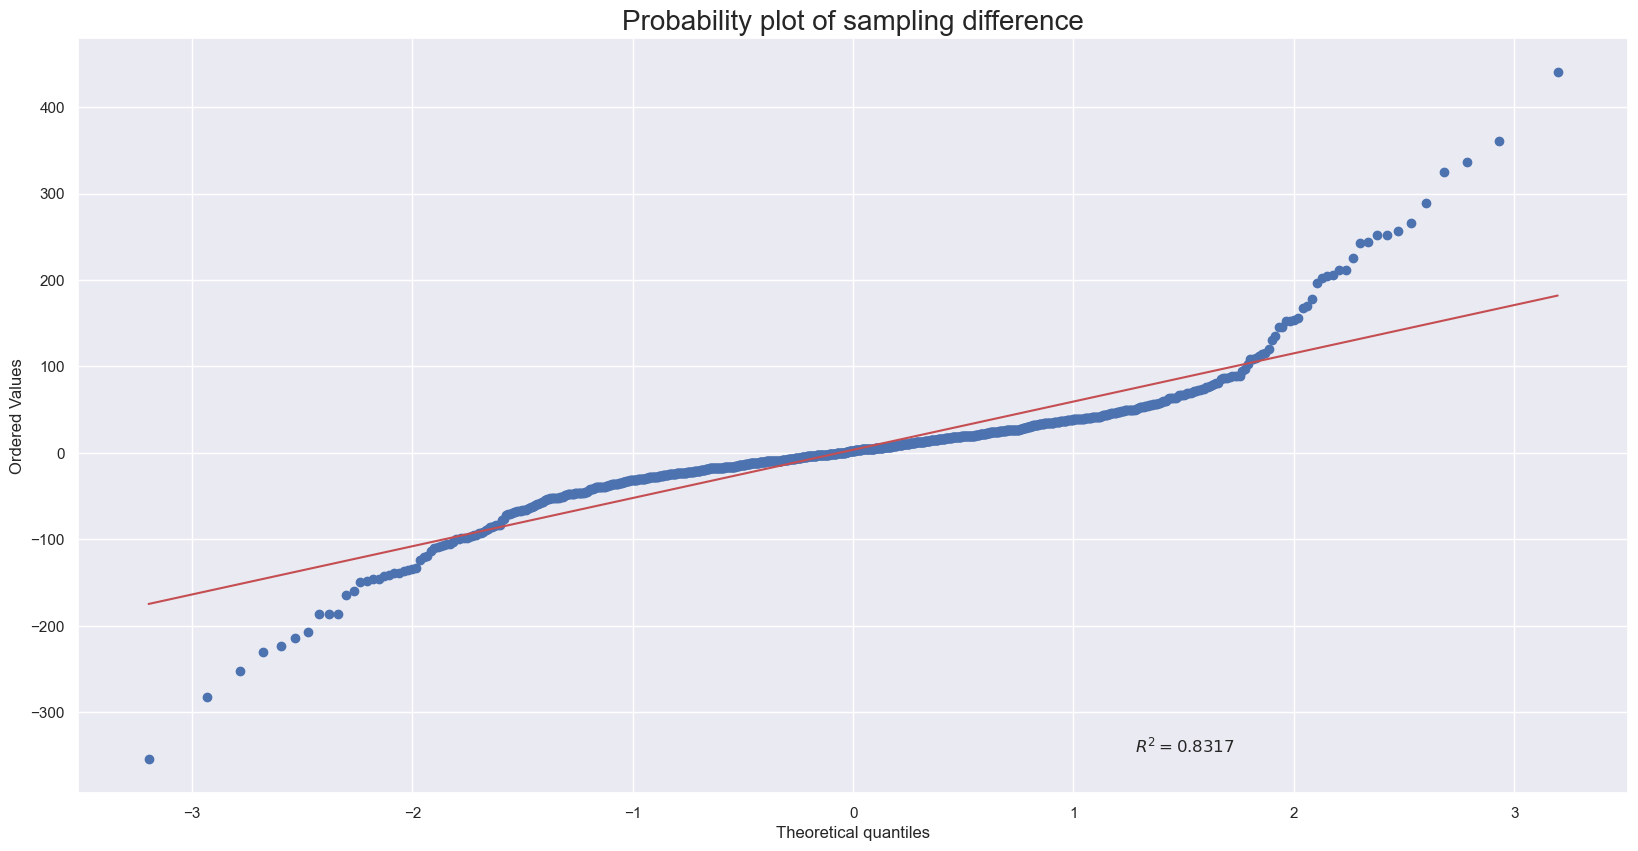

In [31]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(sampling_difference, plot= plt, rvalue= True)
ax.set_title("Probability plot of sampling difference", fontsize= 20)
ax.set

plt.show()

The graph above shows data points stray from the line in an obvious non-linear fashion, the data are not normally distributed. Therefore,  t-test may not be the best statistical method to be used. 

#### Checking whether Samples have equal variances
One of the assumptions is that both groups have equal variances. One method for testing this assumption is the Levene's test of homogeneity of variances. This can be completed using the levene() method from Scipy.stats.

In [32]:
stats.levene(ua['arr_delay'], dl['arr_delay'], center = 'mean')

LeveneResult(statistic=2.113276339858747, pvalue=0.14618343424608268)

The test is significant which indicates the groups have a different amount of variation and that the t-test may not be the best statistical method to be used. Again, it may be worthwhile to check this assumption visually as well. 

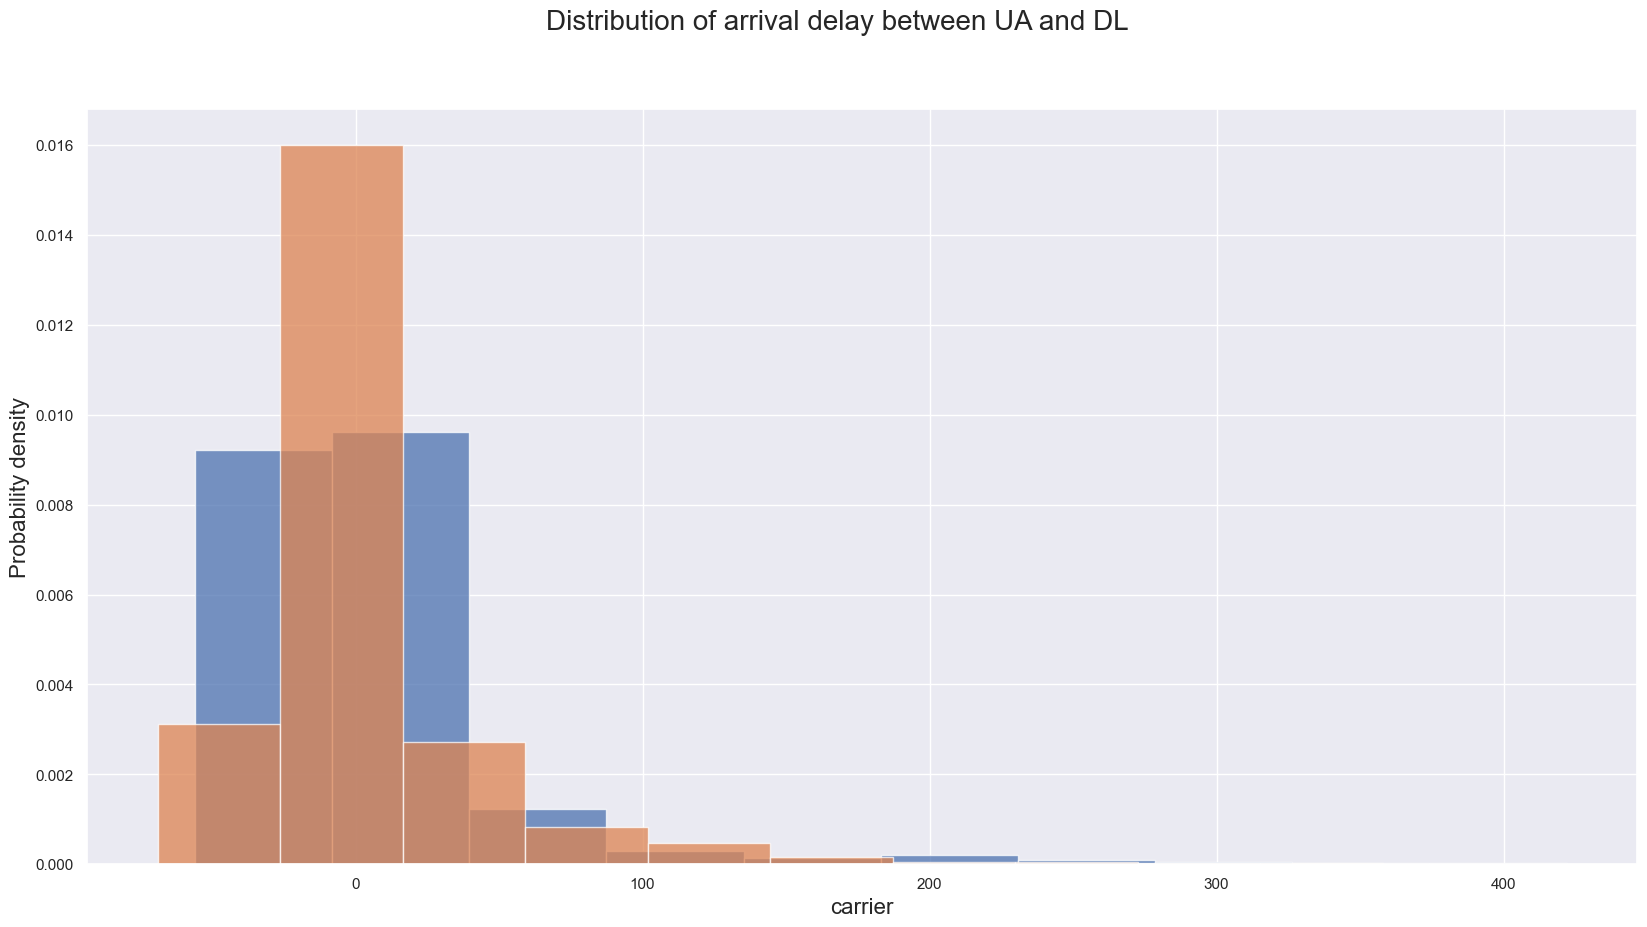

In [33]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)


p_ua = plt.hist(ua['arr_delay'], label= "UA", density= True, alpha=0.75)
p_dl = plt.hist(dl['arr_delay'], label= "DL", density= True, alpha=0.75) 


plt.suptitle("Distribution of arrival delay between UA and DL", fontsize= 20)
plt.xlabel("carrier", fontsize= 16)
plt.ylabel("Probability density", fontsize= 16)

plt.show()

The graph indicates the groups have a different amount of variation and that the t-test may not be the best statistical method to be used. 

### Therefore, T test cannot be used to say that Delta Airlines (DL) flights are delayed more than United Airlines (UA) flights as all assumptions of T test are not met